# Analyzing customer feedback using spaCy and TextBlob.

In [11]:
import spacy
from textblob import TextBlob
import pandas as pd
import csv

import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
nlp=spacy.load('en_core_web_sm')
file_path="feedback_data.csv"

In [13]:
with open(file_path, "r", encoding="utf-8") as file:
    feedback_data = file.readlines()

In [14]:
output_csv_path='output.csv'
csv_header = ["Feedback Index", "Sentiment Polarity", "Sentiment Subjectivity", "Named Entities", "Preferred Contact Method"]

In [15]:
with open(output_csv_path, "w", newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(csv_header)

In [18]:
with open(output_csv_path, "w", newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(csv_header)
    for idx,narrative in enumerate(feedback_data,start=1):
        print(narrative.strip())
        doc=nlp(narrative.strip())
        blob=TextBlob(narrative)
        sentiment_polarity=blob.sentiment.polarity
        sentiment_subjectivity=blob.sentiment.subjectivity
        print(f"Sentiment polarity: {sentiment_polarity} (sentiment subjectivity), {sentiment_subjectivity} ")
        entities = [(ent.text, ent.label_) for ent in doc.ents]
        print("Named Entities:", entities)
        preffered_contact_method="chat" if "email" not in narrative.lower() else "email"
        writer.writerow([narrative.strip(),sentiment_polarity,sentiment_subjectivity,preffered_contact_method])

Your products are excellent. I really love the quality! However, delivery to my location in Los Angeles was a bit slow. abbey@email.com
Sentiment polarity: 0.44166666666666665 (sentiment subjectivity), 0.6666666666666666 
Named Entities: [('Los Angeles', 'GPE')]
The customer service team in New York was helpful in resolving my issue. I appreciate the assistance. brian@email.com
Sentiment polarity: 0.13636363636363635 (sentiment subjectivity), 0.45454545454545453 
Named Entities: [('New York', 'GPE')]
The new features in the latest release are fantastic! They have greatly improved the user experience in San Francisco.
Sentiment polarity: 0.48409090909090907 (sentiment subjectivity), 0.7511363636363636 
Named Entities: [('San Francisco', 'GPE')]
The product didn't meet my expectations, and I'm disappointed. I hope you can address the issues in Chicago. My email address is emailme@email.com
Sentiment polarity: -0.75 (sentiment subjectivity), 0.75 
Named Entities: [('Chicago', 'GPE')]


In [19]:
df=pd.read_csv(output_csv_path)
df.head(3)

,Feedback Index,Sentiment Polarity,Sentiment Subjectivity,Named Entities,Preferred Contact Method
0,Your products are excellent. I really love the...,0.441667,0.666667,email,NaN
1,The customer service team in New York was help...,0.136364,0.454545,email,NaN
2,The new features in the latest release are fan...,0.484091,0.751136,chat,NaN


#Exercise #2: Read in Feedback File and Create Output File for Results

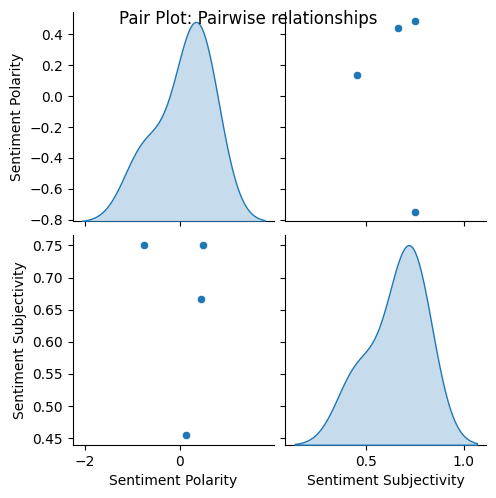

In [20]:
# Pair Plot: Pairwise relationships
sns.pairplot(data=df[['Sentiment Polarity', 'Sentiment Subjectivity']],
             diag_kind='kde')
plt.suptitle('Pair Plot: Pairwise relationships')
plt.show()